# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [52]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [3]:

iris_data = load_iris()


In [6]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    # YOUR CODE HERE
    df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    df_iris['target'] = iris_data.target
    df_iris['class'] = iris_data.target_names[iris_data.target]
    df_iris.columns = [col.replace("(cm)", "").strip() for col in df_iris.columns]

    return df_iris
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
139,6.9,3.1,5.4,2.1,2,virginica
18,5.7,3.8,1.7,0.3,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
132,6.4,2.8,5.6,2.2,2,virginica
65,6.7,3.1,4.4,1.4,1,versicolor
74,6.4,2.9,4.3,1.3,1,versicolor
106,4.9,2.5,4.5,1.7,2,virginica
110,6.5,3.2,5.1,2.0,2,virginica
10,5.4,3.7,1.5,0.2,0,setosa
20,5.4,3.4,1.7,0.2,0,setosa


In [7]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [21]:
#From our data we will only get variable columns as np.array
x = 0
# YOUR CODE HERE
x=df_iris[["sepal length","sepal width","petal length","petal width"]].to_numpy()
type(x)

numpy.ndarray

In [22]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [36]:
mergings = 0 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
dist_matrix = distance_matrix(x,x)
mergings = hierarchy.linkage(dist_matrix, 'complete')


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


In [26]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

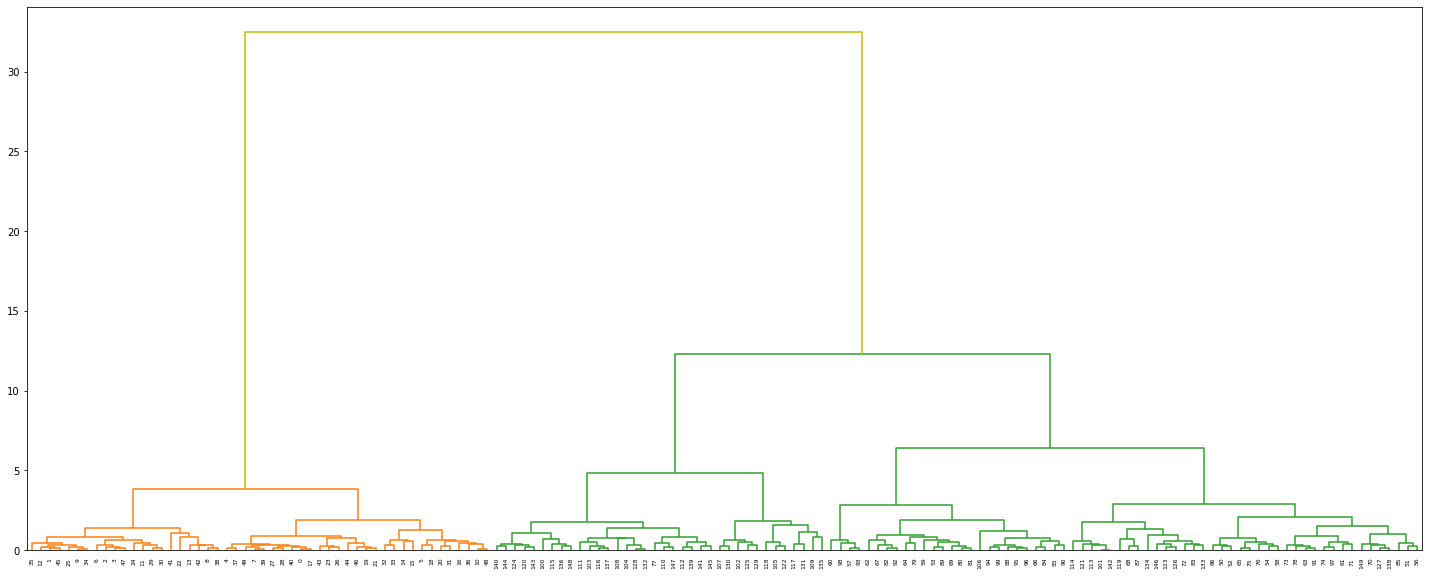

In [43]:
dn = 0
# YOUR CODE HERE


Z = linkage(x, 'ward')
fig = plt.figure(figsize=(25, 10))

dn = dendrogram(Z, leaf_rotation=90,leaf_font_size=6, above_threshold_color='y',
                           orientation='top')


#Z = linkage(x, 'single')
#fig = plt.figure(figsize=(25, 10))
#dn = dendrogram(Z, leaf_rotation=90,leaf_font_size=6, above_threshold_color='y',
#                           orientation='top')
#labels=varieties, leaf_rotation=90, and leaf_font_size=6
plt.show()

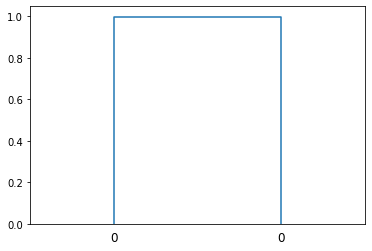

In [38]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [85]:
from sklearn.cluster import KMeans

df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [67]:
model = 0
# YOUR CODE HERE
model = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)


In [68]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [86]:
# YOUR CODE HERE
x = StandardScaler().fit_transform(points)
model.fit(points)

KMeans(n_clusters=3, n_init=12)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [89]:
# YOUR CODE HERE
#labels = model.labels_
labels=model.predict(points)
k_means_cluster_centers = model.cluster_centers_
k_means_cluster_centers

labels

array([2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0,
       0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 0,
       1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1,
       0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0,
       1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0,
       0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2,
       1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0], d

In [90]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [97]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    for i in labels:
        if i==0:
            data_0.append(0)
        elif i==1:
            data_1.append(1)
        else:
            data_2.append(2)
    data_0=np.array(data_0)
    data_1=np.array(data_1)
    data_2=np.array(data_2)

    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(95,)
(94,)
(111,)


In [93]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

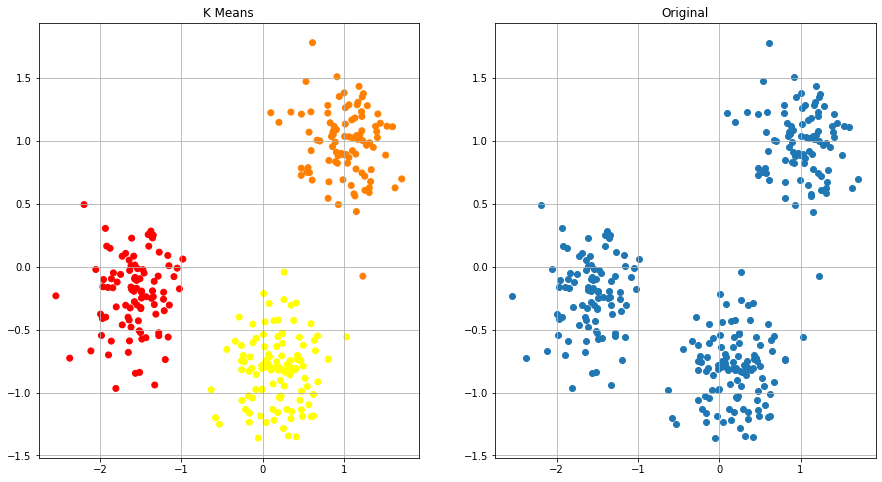

In [116]:
# plotting the data 

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.set_title('K Means')
ax1.scatter(points[:,0],points[:,1],c=labels,cmap='autumn')
ax2.set_title("Original")
ax2.scatter(points[:,0],points[:,1])
ax1.grid()
ax2.grid()


**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [118]:

# YOUR CODE HERE
new_labels=model.predict(new_points)

In [119]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [120]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []
new_0,new_1,new_2=separate_labels(new_labels, points)


In [121]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

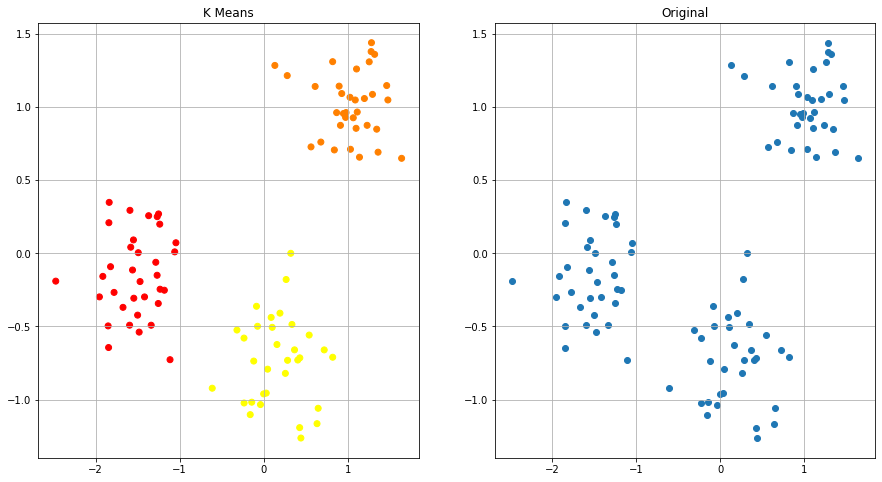

In [139]:
#plot the new labels
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.set_title('K Means')
ax1.scatter(new_points[:,0],new_points[:,1],c=new_labels,cmap="autumn")
ax2.set_title("Original")
ax2.scatter(new_points[:,0],new_points[:,1])
ax1.grid()
ax2.grid()



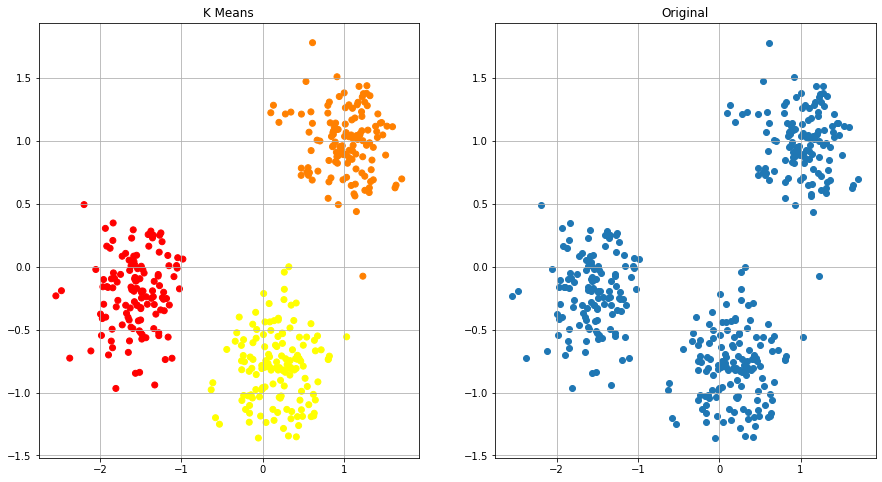

In [144]:
#plot all the points together

last_labels=np.append(labels, new_labels, 0)
last_points=np.append(points,new_points,0)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.set_title('K Means')
ax1.scatter(last_points[:,0],last_points[:,1],c=last_labels,cmap='autumn')
ax2.set_title("Original")
ax2.scatter(last_points[:,0],last_points[:,1])
ax1.grid()
ax2.grid()




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=796ba814-f632-4502-b0d7-7e2f8f9e546d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>